#Presets

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving HAM10000_metadata.csv to HAM10000_metadata.csv


In [ ]:
address = 'HAM10000_metadata.csv'
df = pd.read_csv(address)
df

df.info()       #Find general info
df.isna().sum() #find how many unknowns
df['dx'].value_counts()       #Stratification stats
df['dx_type'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


histo        5340
follow_up    3704
consensus     902
confocal       69
Name: dx_type, dtype: int64

dx is the diagnosis and type is how the diagnosis was made  https://arxiv.org/abs/1803.10417

In [ ]:
dx_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}    #Types of lesion for mapping as words ineffiicent storage

df['diagnosis'] = df['dx'].map(dx_dict.get)  #Swap
df.sex.value_counts()   #More data points
df.localization.value_counts()
df.age.value_counts()

45.0    1299
50.0    1187
55.0    1009
40.0     985
60.0     803
70.0     756
35.0     753
65.0     731
75.0     618
30.0     464
80.0     404
85.0     290
25.0     247
20.0     169
5.0       86
15.0      77
10.0      41
0.0       39
Name: age, dtype: int64

In [ ]:
import numpy as np

value = df.age.mean()
print(value)
df.age = df.age.fillna(value)
df.isna().sum()


51.863828077927295


lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
diagnosis       0
dtype: int64

Manually imputed the mean into the age to remove all the Nan from the database while keeping the same mean so the distribution will not change

#**DATA ANALYSIS**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

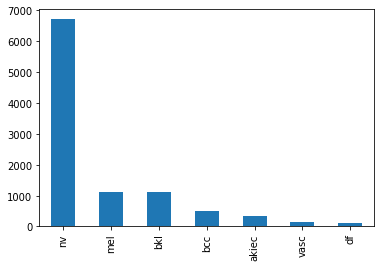

In [ ]:
df['dx'].value_counts().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


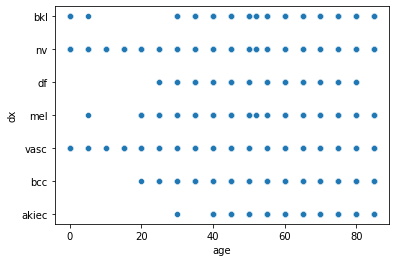

In [ ]:
sns.scatterplot('age','dx',data=df)

#**Preprocessing**



Need to convert words to numbers, need to do it manually

In [ ]:
from sklearn import preprocessing


#Need to label encode and one hot encode/ normalise
label_encoder = preprocessing.LabelEncoder()
df1 = df.copy()
#df1.lesion_id

In [ ]:
lesion_id_cat = label_encoder.fit_transform(df1['lesion_id'])
lesion_id_cat = pd.DataFrame({'lesion_id_cat': lesion_id_cat})

image_id_cat = label_encoder.fit_transform(df1['image_id'])
image_id_cat = pd.DataFrame({'image_id_cat': image_id_cat})

dx_cat = label_encoder.fit_transform(df1['dx'])
dx_cat = pd.DataFrame({'dx_cat': dx_cat})

dx_type_cat = label_encoder.fit_transform(df1['dx_type'])
dx_type_cat = pd.DataFrame({'dx_type_cat': dx_type_cat})

sex_cat = label_encoder.fit_transform(df1['sex'])
sex_cat = pd.DataFrame({'sex_cat': sex_cat})

localization_cat = label_encoder.fit_transform(df1['localization'])
localization_cat = pd.DataFrame({'localization_cat': localization_cat})

diagnosis_cat = label_encoder.fit_transform(df1['dx'])
diagnosis_cat = pd.DataFrame({'diagnosis_cat': diagnosis_cat})

In [ ]:
df1.lesion_id = lesion_id_cat
df1.image_id = image_id_cat
df1.dx = dx_cat
df1.dx_type = dx_type_cat
df1.sex = sex_cat
df1.localization = localization_cat
df1.dx = diagnosis_cat


convertor = {
    'bkl':2,
    'nv':5,
    'akiec':0,
    'mel':4,
    'bcc':1,
    'vasc':6,
    'df':3,

}
df1

,lesion_id,image_id,dx,dx_type,age,sex,localization,diagnosis
0,118,3113,2,3,80.0,1,11,Benign keratosis-like lesions
1,118,724,2,3,80.0,1,11,Benign keratosis-like lesions
2,2710,2463,2,3,80.0,1,11,Benign keratosis-like lesions
3,2710,1355,2,3,80.0,1,11,Benign keratosis-like lesions
4,1460,7327,2,3,75.0,1,4,Benign keratosis-like lesions
...,...,...,...,...,...,...,...,...
10010,2844,8778,0,3,40.0,1,0,Actinic keratoses
10011,2844,9244,0,3,40.0,1,0,Actinic keratoses
10012,2844,9230,0,3,40.0,1,0,Actinic keratoses
10013,239,8548,0,3,80.0,1,5,Actinic keratoses


In [ ]:
print(np.array(df1['dx'])[64])

5


#**Normalisation**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#Using modules

scaled_features = df1.copy()

col_names = ['lesion_id', 'image_id' , 'dx', 'dx_type', 'age', 'sex', 'localization'] #Removed diagnosis
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] =  features

X = scaled_features.drop(columns=['dx','lesion_id','image_id'],axis=1)
X.insert(0,1.0,1.0)
X
y = [1 if each == 'bkl' or each == 'nv' or each == 'df' else 0 for each in df.dx] # or y = df.dx

print(scaled_features)

       lesion_id  image_id        dx   dx_type       age       sex  \
0      -1.680017 -0.655118 -1.496108  0.835507  1.662953  0.882321   
1      -1.680017 -1.481453 -1.496108  0.835507  1.662953  0.882321   
2      -0.474447 -0.879948 -1.496108  0.835507  1.662953  0.882321   
3      -0.474447 -1.263195 -1.496108  0.835507  1.662953  0.882321   
4      -1.055837  0.802468 -1.496108  0.835507  1.367434  0.882321   
...          ...       ...       ...       ...       ...       ...   
10010  -0.412122  1.304356 -2.867221  0.835507 -0.701196  0.882321   
10011  -0.412122  1.465542 -2.867221  0.835507 -0.701196  0.882321   
10012  -0.412122  1.460699 -2.867221  0.835507 -0.701196  0.882321   
10013  -1.623738  1.224801 -2.867221  0.835507  1.662953  0.882321   
10014  -0.113056  1.018650 -0.124995  0.835507  1.071915 -1.083518   

       localization                       diagnosis  
0          0.847871  Benign keratosis-like lesions   
1          0.847871  Benign keratosis-like lesions 

In [ ]:
# Manual

#scaled = df1.copy()
#Then use maths operations use folder where it is written out
#Will experiment with standardisation vs normalisation


#**Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split

y = [1 if each == 'bkl' or each == 'nv' or each == 'df' else 0 for each in df.dx]
print(y)
print(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
y.count(0) # == 2096
y.count(1) # == 7919

7919

In [ ]:
print(X_train)
print(X_train.shape)

      1.0   dx_type       age       sex  localization  \
1074  1.0 -2.092788 -0.405678 -1.083518     -1.469256   
3588  1.0 -0.628640 -0.110159 -1.083518      1.479814   
8385  1.0  0.835507 -1.883271  0.882321     -1.469256   
2205  1.0  0.835507  1.367434  0.882321      1.479814   
2441  1.0 -2.092788 -0.996715 -1.083518      1.058519   
...   ...       ...       ...       ...           ...   
2895  1.0  0.835507 -0.405678  0.882321      1.479814   
7813  1.0  0.835507 -2.769827 -1.083518     -0.205369   
905   1.0 -2.092788  1.662953 -1.083518     -0.416016   
5192  1.0 -0.628640 -0.405678 -1.083518      0.426575   
235   1.0  0.835507  1.662953  0.882321      0.847871   

                           diagnosis  
1074  Benign keratosis-like lesions   
3588                Melanocytic nevi  
8385                Melanocytic nevi  
2205                        Melanoma  
2441                Vascular lesions  
...                              ...  
2895            Basal cell carcinoma  
781

In [ ]:
# Normal equation ==

def ComputeCost(X,y,theta):


  m = len(y)


  predictions = X.dot(theta)

  Error = (predictions-y)   #Make sure the right type of squaring should be dot...#

  SError = (Error)**2


  J = (1/2*m) * sum(SError)
  return J





#ComputeCost(X_train,y_train,theta)

In [ ]:
def Regression(X,y):

  theta = np.array([0.79,-0.1,-0.01,-0.14,-0.111]).transpose()
  alpha = 0.05
  m = len(y)
  Js = []

  for __ in range(500):

    predictions = X_train.dot(theta)-y_train
    #print(predictions)
    #print(alpha/m)
    #print(alpha/m * X_train)

    #print(X_train.shape)
    #print(predictions.shape)
    some = (X_train.transpose().dot(predictions))
    #print(some_.shape)

    change = ((alpha/m) * some)
    #print(change)
    theta = theta - change
    #print(theta)

    J = ComputeCost(X_train,y_train,theta)
    Js.append(J)

  plt.plot(Js)
  print(Js[-1])

  return (theta)


#25345962.0
#25345962.


  #Change theta appropriately


#print(Regression(X_train,y_train))

In [ ]:
def Predict(x,y,theta):

  values  = round(x.dot(theta))

  fp = 0
  p  = 0
  fn = 0
  n  = 0
  for a,b in zip(y,values):

    if a == 1:
      if b == 1:
        p += 1
      if b == 0:
        fp +=1

    if a == 0:
      if b == 0:
        n+=1
      if b == 1:
        fn += 1

  print(p , n)
  print(fp , fn)

  print(f'Overall acurracy is {(p+n) / (fp+fn+p+n)}')
  #Confusion matrix




In [ ]:
#Normal Equation
print(X_train.T)
Xs = ((X_train.T)).dot(X_train)
thet = np.linalg.inv(Xs).dot(X_train.transpose())
theta  = thet.dot(y_train)

print(theta)


(ComputeCost(X_train,y_train,theta))

print(theta)


                                        1074              3588  \
1.0                                      1.0               1.0   
dx_type                            -2.092788          -0.62864   
age                                -0.405678         -0.110159   
sex                                -1.083518         -1.083518   
localization                       -1.469256          1.479814   
diagnosis     Benign keratosis-like lesions   Melanocytic nevi   

                          8385      2205              2441              3759  \
1.0                        1.0       1.0               1.0               1.0   
dx_type               0.835507  0.835507         -2.092788          -0.62864   
age                  -1.883271  1.367434         -0.996715         -0.405678   
sex                   0.882321  0.882321         -1.083518         -1.083518   
localization         -1.469256  1.479814          1.058519         -0.205369   
diagnosis     Melanocytic nevi  Melanoma  Vascular lesion

ValueError: ignored

In [ ]:
Predict(X_test,y_test,theta)

Linear regression bad as takes anomolies therefore is not a great idea!

#Neural Net

In [ ]:
def Sigmoid(z):
  return 1/(1+np.exp(-z))

def SigGrad(z):
  return np.multiply(Sigmoid(z),(1-Sigmoid(z)))

In [ ]:
m = X_train.shape[0]

Theta1 = np.matrix([[1.1,3.2,3,2,5],[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5]])  #Needs to be bigger atm only 1 hidden layer
Theta2 = np.matrix([[1.1],[2],[1],[1]])
print(Theta1.shape)
a1 = X_train.copy()

def NNCostFunc():#weights, input_layer_size, hidden_layer_size, num_labels, X, y, lamda):
  global Theta1, Theta2, a1
  #Choosing not to unroll parameters into weight matrices and just use weights

  #2 layers, so 2 weight matrices

  z2 = Theta1.dot(a1.T)
  a2 = Sigmoid(z2)
  layer1 = Sigmoid(np.dot(a1,Theta1.transpose()))
  #print(layer1)

  output = Sigmoid(np.dot(layer1,Theta2))
  #print(output.shape)
  #print('Cost Is done')



  #print(y_train)
  Delta3 = (y_train-output.T).T # = (8012,1)
  Del21 = (Delta3 * Theta2.T)
  #print(Del21.shape)
  Del22 = SigGrad(z2)

  #add = (np.ones(Del22.shape[1]))
  #print(add.shape)
  #print(Del22.T.shape)
  #Del22 = np.column_stack( (add, Del22.T))

  #print(Del22.shape)
  #print(Del22) # =2,8013

  Delta2 = np.multiply(Del22,Del21.T)

  Theta1_grad = (1/m) * (Delta2.dot(a1))
  #print(Theta1_grad)

  Theta2_grad = (1/m) * (a2.dot(Delta3))
  #print(Theta2_grad)

  Theta1 += Theta1_grad
  Theta2 += Theta2_grad
  #print(output)
  return Theta1,Theta2,output



for _ in range(5000):
  Theta1,Theta2,output = NNCostFunc()

In [ ]:
def predict():

  z2 = Theta1.dot(X_test.T)
  a2 = Sigmoid(z2)
  layer1 = Sigmoid(np.dot(X_test,Theta1.transpose()))
  #print(layer1)

  output = Sigmoid(np.dot(layer1,Theta2))

  success,fail = 0,0
  p,n,fp,fn =0,0,0,0
  for a,b in zip(y_test,output.tolist()):
    b = round(b[0])
    if a == b:
      success +=1
    else:
      fail+=1
    if a == 1:
      if b == 1:
        p += 1
      if b == 0:
        fp +=1

    if a == 0:
      if b == 0:
        n+=1
      if b == 1:
        fn += 1

  print(p , n)
  print(fp , fn)
    #if b[0] < 0.7:
    #  print(a,b)
  print( f'Overall Success is {success/(success+fail)} ')
predict()

#Logistic Regression 1 vs All


We will take a 1 vs many approach, so will need to do a seperate regression for each of the different values for *y*

In [ ]:
y = df1['dx']
all_theta = np.empty((6,5))
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.2, random_state=1)
s = y_test+0
for x in range(0,6):
  y_now = [1 if each==x else 0 for each in y]

  X_train, X_test, y_train, y_test = train_test_split(
      X, y_now, test_size=0.2, random_state=1)
    #print(y_now.count(1))

  theta = Regression(X_train,y_train)
  #print(theta)
  all_theta[x] = theta
  pred = X_train.dot(theta)

print(all_theta)


OneVsAllPredict(all_theta,X_test)


In [ ]:
def OneVsAllPredict(all_theta,X):

  #Assume X has 0s
  probs = X.dot(all_theta.transpose())
  #print(probs)
  pred = probs.idxmax(1)
  #print(pred)

  print(s[70:80])
  success = 0
  fail = 0
  for a,b in zip(s,pred):
    if a==b:
      success +=1
    else:
      fail+=1
  print(f'Overall Accuracy of {success/(success+fail)}')   #0.6689

  s_1var = [1 if each == 2 or each == 5 or each == 3 else 0 for each in s]
  pred_1 = [1 if each == 2 or each == 5 or each == 3 else 0 for each in s]

  for a,b in zip(s_1var,pred_1):
    if a==b:
      success +=1
    else:
      fail+=1
  print(f'Overall Accuracy 2 of {success/(success+fail)}')   #0.8344




OneVsAllPredict(all_theta,X_test)


#Overall still overpredicts on 5

# To do

Here, we need to do standardisation and normalisation using no modules!
If time make a svm but otherwise will be fine

In [ ]:
print(y)